<b>Minor Project by Abhishek Chandra, Batch 1, Machine Learning with Python</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set = pd.read_csv('StudentsPerformance.csv')
data_set.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data_set.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data_set = data_set.rename(columns = {'race/ethnicity': 'race',
                          'parental level of education': 'parentedu',
                          'test preparation course': 'course',
                          'math score': 'mscore',
                          'reading score': 'rscore',
                          'writing score': 'wscore'})
data_set.head()

,gender,race,parentedu,lunch,course,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
print(data_set['course'].unique(),
data_set['lunch'].unique(),
data_set['parentedu'].unique(),
data_set['race'].unique())

['none' 'completed'] ['standard' 'free/reduced'] ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] ['group B' 'group C' 'group A' 'group D' 'group E']


In [7]:
data_set.describe()

,mscore,rscore,wscore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
sum(data_set.duplicated())

0

In [9]:
category_data = data_set[['gender', 'race', 'parentedu', 'lunch', 'course']]
category_data.head()

,gender,race,parentedu,lunch,course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [10]:
numeric_data = data_set.drop(['gender', 'race', 'parentedu', 'lunch', 'course'], axis=1)
numeric_data.head()

,mscore,rscore,wscore
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


<b>Plotting relationship between numeric_data only</b>

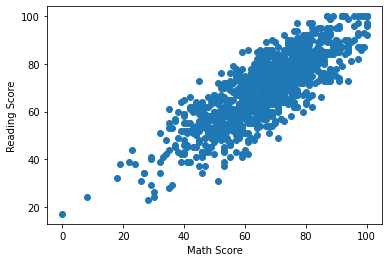

In [11]:
plt.scatter(x=numeric_data['mscore'], y=numeric_data['rscore'])
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

<b>Observations:</b>
1. This plot shows co-relation between 'Math Score' and 'Reading Score'
2. We can determine that score between 0-40 in Maths and 0-60 in Reading are loosely related and highly co-related after that.

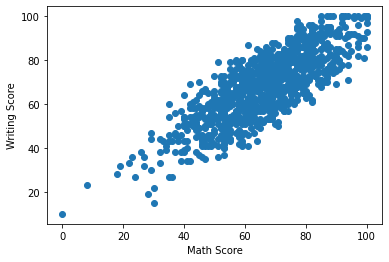

In [12]:
plt.scatter(x=numeric_data['mscore'], y=numeric_data['wscore'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

<b>Observations:</b>
1. This plot shows co-relation between 'Math Score' and 'Writing Score'
2. We can determine that score between Maths and Writing are highly co-related but scattered in nature.

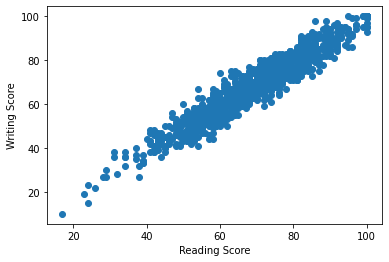

In [13]:
plt.scatter(x=numeric_data['rscore'], y=numeric_data['wscore'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

<b>Observations:</b>
1. This plot shows co-relation between 'Reading Score' and 'Writing Score'
2. We can determine that score is highly co-related as well as dense in nature.

<b>Plotting the frequency of numeric_data</b>

In [14]:
from collections import Counter

In [15]:
mstud = Counter(min(m//10 * 10, 90) for m in numeric_data['mscore'])
rstud = Counter(min(r//10 * 10, 90) for r in numeric_data['rscore'])
wstud = Counter(min(w//10 * 10, 90) for w in numeric_data['wscore'])

Counter({60: 268, 70: 216, 50: 188, 80: 135, 40: 95, 90: 58, 30: 26, 20: 10, 10: 2, 0: 2})


Text(0, 0.5, 'No. of Students')

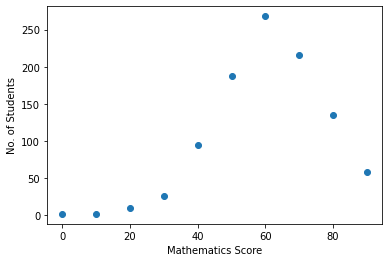

In [16]:
print(mstud)
plt.scatter(list(mstud.keys()),list(mstud.values()))
plt.xlabel('Mathematics Score')
plt.ylabel('No. of Students')

1. This graph is a scatter plot betweeen Mathematics score and No. of students.
2. We can determine mode is nearly around 60.

Counter({70: 264, 60: 233, 80: 170, 50: 164, 90: 79, 40: 64, 30: 18, 20: 7, 10: 1})


Text(0, 0.5, 'No. of Students')

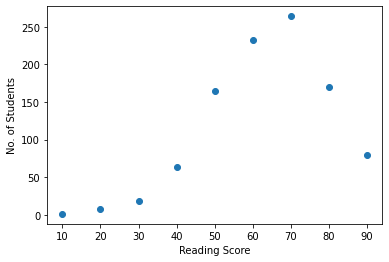

In [17]:
print(rstud)
plt.scatter(list(rstud.keys()),list(rstud.values()))
plt.xlabel('Reading Score')
plt.ylabel('No. of Students')

1. This graph is a scatter plot betweeen Reading score and No. of students.
2. We can determine mode is nearly around 75.

Counter({70: 254, 60: 230, 50: 167, 80: 157, 40: 82, 90: 78, 30: 23, 20: 6, 10: 3})


Text(0, 0.5, 'No. of Students')

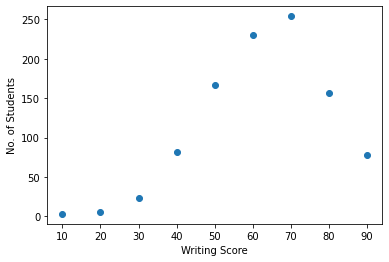

In [18]:
print(wstud)
plt.scatter(list(wstud.keys()),list(wstud.values()))
plt.xlabel('Writing Score')
plt.ylabel('No. of Students')

1. This graph is a scatter plot betweeen Writing score and No. of students.
2. We can determine mode is nearly around 70.

<b>Plotting frequency of students</b>

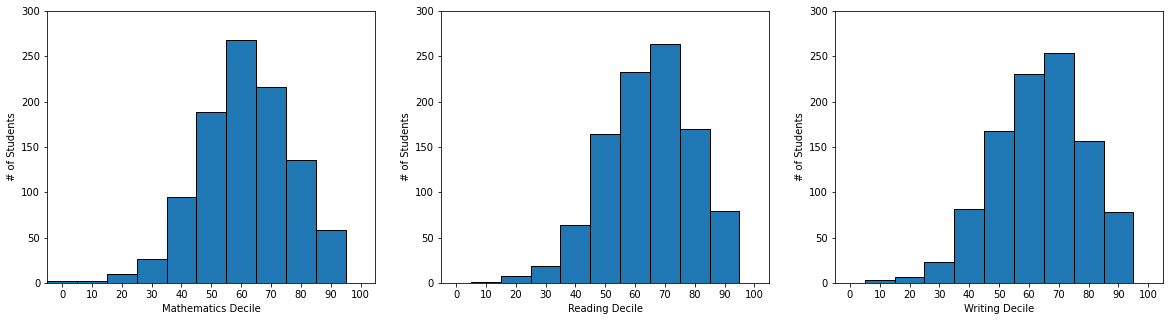

In [19]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(mstud.keys(), mstud.values(), 10, edgecolor=(0,0,0))
plt.axis([-5, 105, 0, 300])
plt.xticks([10*i for i in range(11)])
plt.xlabel('Mathematics Decile')
plt.ylabel('# of Students')

plt.subplot(132)
plt.bar(rstud.keys(), rstud.values(), 10, edgecolor=(0,0,0))
plt.axis([-5, 105, 0, 300])
plt.xticks([10*i for i in range(11)])
plt.xlabel('Reading Decile')
plt.ylabel('# of Students')

plt.subplot(133)
plt.bar(wstud.keys(), wstud.values(), 10, edgecolor=(0,0,0))
plt.axis([-5, 105, 0, 300])
plt.xticks([10*i for i in range(11)])
plt.xlabel('Writing Decile')
plt.ylabel('# of Students')
plt.show()

<b>Plotting the outliers</b>

<AxesSubplot:>

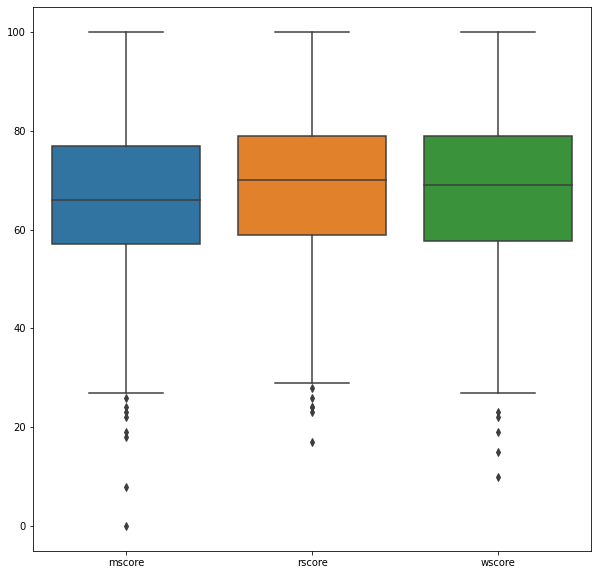

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = numeric_data)

1. The above graph shows the outliers of mathematics score, reading score and writing score.
2. Outliers are the data which has abnormal distance from the central data and disturbs the flow of data.

<b>Plotting and analysing data against various categories </b>

In [21]:
data_set.groupby('gender').mean()

,mscore,rscore,wscore
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<AxesSubplot:ylabel='gender'>

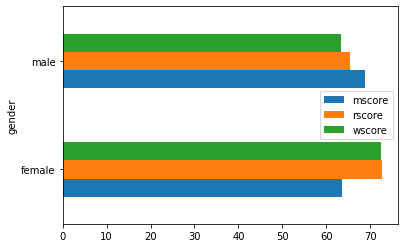

In [22]:
data_set.groupby('gender').mean().plot(kind = 'barh')

1. The above graph shows relation between gender(male, female) and scores of students.
2. It shows that female score more than male students.

In [23]:
data_set.groupby('lunch').mean()

,mscore,rscore,wscore
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


<AxesSubplot:ylabel='lunch'>

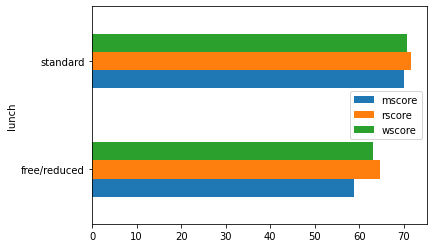

In [24]:
data_set.groupby('lunch').mean().plot(kind = 'barh')

1. The above graph shows relation between lunch type and score of students.
2. Standard lunch type have more average scores as compared to fee/reduced students.

In [25]:
data_set.groupby('parentedu').mean()

,mscore,rscore,wscore
parentedu,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


<AxesSubplot:ylabel='parentedu'>

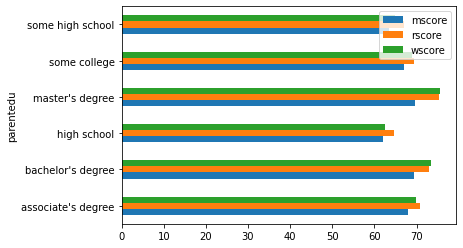

In [26]:
data_set.groupby('parentedu').mean().plot(kind = 'barh')

1. The above graph shows relation between parent education and scores of students.
2. Student's parents having master degree have maximum average scores and student's parents having high school degree score lowest average marks.

In [27]:
data_set.groupby('race').mean()

,mscore,rscore,wscore
race,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


<AxesSubplot:ylabel='race'>

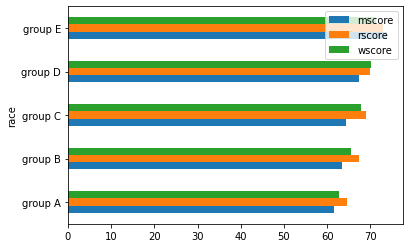

In [28]:
data_set.groupby('race').mean().plot(kind = 'barh')

1. The above graph shows relation between race and score of students.
2. Group E students score maximum average marks, while Group A students have lowest average marks.

In [29]:
data_set.groupby('course').mean()

,mscore,rscore,wscore
course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<AxesSubplot:ylabel='course'>

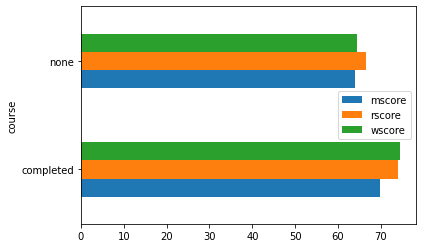

In [30]:
data_set.groupby('course').mean().plot(kind = "barh")

1. The above graph shows relation between courses and scores of students.
2. Students having completed course score more than the none course opted students.

In [31]:
data_set.groupby(['gender','race']).mean()

mscore     rscore     wscore
gender race                                    
female group A  58.527778  69.000000  67.861111
       group B  61.403846  71.076923  70.048077
       group C  62.033333  71.944444  71.777778
       group D  65.248062  74.046512  75.023256
       group E  70.811594  75.840580  75.536232
male   group A  63.735849  61.735849  59.150943
       group B  65.930233  62.848837  60.220930
       group C  67.611511  65.424460  62.712230
       group D  69.413534  66.135338  65.413534
       group E  76.746479  70.295775  67.394366

<AxesSubplot:ylabel='gender,race'>

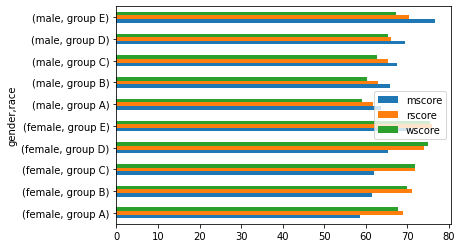

In [32]:
data_set.groupby(['gender','race']).mean().plot(kind = 'barh')

1. The above graph is three data relation between gender, race and scores of data.
2. Students of Male Group E and Female Group E have maximum average score than other students.

In [33]:
data_set.groupby(['gender','parentedu']).mean()

mscore     rscore     wscore
gender parentedu                                          
female associate's degree  65.250000  74.120690  74.000000
       bachelor's degree   68.349206  77.285714  78.380952
       high school         59.351064  68.202128  66.691489
       master's degree     66.500000  76.805556  77.638889
       some college        65.406780  73.550847  74.050847
       some high school    59.296703  69.109890  68.285714
male   associate's degree  70.764151  67.433962  65.405660
       bachelor's degree   70.581818  68.090909  67.654545
       high school         64.705882  61.480392  58.539216
       master's degree     74.826087  73.130435  72.608696
       some college        69.009259  64.990741  63.148148
       some high school    67.840909  64.693182  61.375000

<AxesSubplot:xlabel='gender,parentedu'>

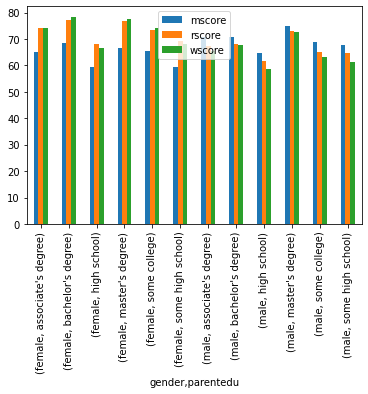

In [34]:
data_set.groupby(['gender','parentedu']).mean().plot(kind = 'bar')


The above graph is three way relation between gender, parent education and scores of .

In [35]:
data_set.groupby(['gender','lunch']).mean()

mscore     rscore     wscore
gender lunch                                        
female free/reduced  55.814815  67.386243  66.444444
       standard      68.124620  75.607903  75.927052
male   free/reduced  62.457831  61.542169  59.126506
       standard      72.022152  67.537975  65.509494

<AxesSubplot:xlabel='gender,lunch'>

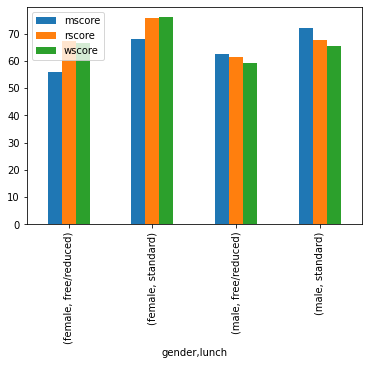

In [36]:
data_set.groupby(['gender','lunch']).mean().plot(kind = 'bar')

The above graph is three way relation between gender, lunch and scores of students.

In [37]:
data_set.groupby(['gender','course']).mean()

mscore     rscore     wscore
gender course                                    
female completed  67.195652  77.375000  78.793478
       none       61.670659  69.982036  68.982036
male   completed  72.339080  70.212644  69.793103
       none       66.688312  62.795455  59.649351

<AxesSubplot:xlabel='gender,course'>

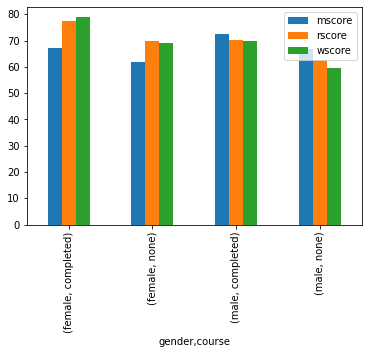

In [38]:
data_set.groupby(['gender','course']).mean().plot(kind = 'bar')

The above graph is three way relation between gender, test preperation courses and scores of students.

In [39]:
data_set.groupby(['gender','race','lunch']).mean()

mscore     rscore     wscore
gender race    lunch                                        
female group A free/reduced  49.928571  61.071429  58.285714
               standard      64.000000  74.045455  73.954545
       group B free/reduced  56.512821  69.153846  67.230769
               standard      64.338462  72.230769  71.738462
       group C free/reduced  52.838710  65.564516  64.080645
               standard      66.864407  75.296610  75.822034
       group D free/reduced  58.039216  69.607843  70.411765
               standard      69.961538  76.948718  78.038462
       group E free/reduced  61.304348  68.217391  67.652174
               standard      75.565217  79.652174  79.478261
male   group A free/reduced  58.590909  60.227273  56.500000
               standard      67.387097  62.806452  61.032258
       group B free/reduced  58.633333  57.233333  54.100000
               standard      69.839286  65.857143  63.500000
       group C free/reduced  60.673077  60.846154  58.230769
               standard      71.758621  68.160920  65.390805
       group D free/reduced  64.681818  62.750000  61.863636
               standard      71.752809  67.808989  67.168539
       group E free/reduced  73.277778  69.388889  66.611111
               standard      77.924528  70.603774  67.660377

<AxesSubplot:ylabel='gender,race,lunch'>

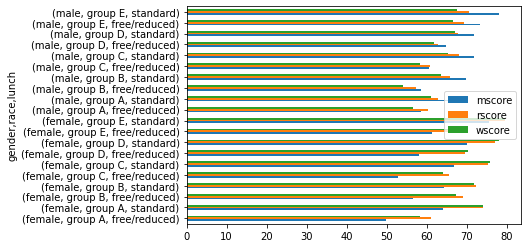

In [40]:
data_set.groupby(['gender','race','lunch']).mean().plot(kind = 'barh')

----------------------------------------------------------------------------------------END-----------------------------------------------------------------------------------------------------------